In [1]:
# import thr needed packages
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
df_normal=pd.read_csv(r'/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_Normal.csv')

In [3]:
df_normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [4]:
df_normal['attack']='normal'

In [5]:
df_normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal


In [6]:
df_normal.shape

(576710, 42)

In [7]:
df_smurf = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_Smurf.csv')
df_satan = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_Satan.csv')
df_root_kit = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_RootKit.csv')
df_port_sweep = pd.read_csv(r'/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_PortSweep.csv')
df_neptune = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_Neptune.csv')
df_nmap = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_NMap.csv')
df_guess_pass = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_GuessPassword.csv')
df_ftp_write = pd.read_csv(r'/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_FTPWrite.csv')
df_buffer_overflow = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back_BufferOverflow.csv')
df_back = pd.read_csv('/content/gdrive/MyDrive/12. Capstone Case Study - Cyber Security Case Study/Data_of_Attack_Back.csv')

In [8]:
df_back.shape

(968, 42)

In [9]:
list_of_df = [df_normal,
              df_satan,
              df_root_kit,
              df_port_sweep,
              df_smurf,
              df_neptune,
              df_nmap,
              df_guess_pass,
              df_ftp_write ,
              df_buffer_overflow,
              df_back]


df = pd.concat(list_of_df, ignore_index=True, sort=False)

In [10]:
df.shape

(817551, 42)

In [11]:
df.columns

Index(['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'attack'],
      dtype='object')

In [12]:
cols=[i.strip() for i in df.columns]
df.columns=cols

In [13]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack'],
      dtype='object')


In [14]:
df.attack.unique()

array(['normal', 'Satan', 'RootKit', 'PortSweep', 'Smurf', 'Neptune',
       'Nmap', 'Guess_password', 'FTP_ write', 'buffer_overflow', 'back'],
      dtype=object)

In [15]:
df.drop_duplicates(keep='first',inplace=True)

In [16]:
df.protocol_type.unique()

array([0.  , 0.01, 0.02])

In [17]:
df.service.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.13, 0.14, 0.17, 0.32, 0.22, 0.12, 0.33, 0.39, 0.19, 0.62,
       0.35, 0.24, 0.36, 0.37, 0.38, 0.52, 0.47, 0.59, 0.55, 0.28, 0.29,
       0.27, 0.26, 0.25, 0.23, 0.21, 0.2 , 0.15, 0.16, 0.3 , 0.31, 0.18,
       0.5 , 0.46, 0.58, 0.57, 0.51, 0.41, 0.6 , 0.56, 0.43, 0.4 , 0.63,
       0.64, 0.65, 0.42, 0.53, 0.48, 0.44, 0.45, 0.34, 0.54, 0.61, 0.49,
       0.67])

In [18]:
df.flag.unique()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1 , 0.09])

In [19]:
df1=df.copy()

In [20]:
df1.attack=np.where(df1.attack!='normal','attack','normal')

In [21]:
df1.attack.value_counts(normalize=True)

normal    0.705412
attack    0.294588
Name: attack, dtype: float64

In [22]:
# let's convert protocol,service and flag to object type
df1['protocol_type']=df1['protocol_type'].astype('object')
df1['service']=df1['service'].astype('object')
df1['flag']=df1['flag'].astype('object')
df1['logged_in']=df1['logged_in'].astype('category')
df1['root_shell']=df1['root_shell'].astype('object')
df1['su_attempted']=df1['su_attempted'].astype('object')
df1['is_host_login']=df1['is_host_login'].astype('object')
df1['is_guest_login']=df1['is_guest_login'].astype('object')

In [24]:
cat_var=df1.select_dtypes(['object','category'])
cat_var.columns

Index(['protocol_type', 'service', 'flag', 'logged_in', 'root_shell',
       'su_attempted', 'is_host_login', 'is_guest_login', 'attack'],
      dtype='object')

In [25]:
cont_var=df1.select_dtypes(['float64','int64'])
cont_var.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'num_outbound_cmds', 'count', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

In [26]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([ x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [27]:
cont_var.apply(continuous_var_summary).T

,NMISS,SUM,MEAN,MEDIAN,STD,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,0.0,716.83470,8.768073e-04,0.00000,0.026636,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.001500,1.000
src_bytes,0.0,4056.18442,4.961384e-03,0.00217,0.033235,0.0,0.000,0.000,0.000,0.000,0.00217,0.00299,0.00367,0.01154,0.070120,1.000
dst_bytes,0.0,20326.03324,2.486210e-02,0.00367,0.066635,0.0,0.000,0.000,0.000,0.000,0.00367,0.01969,0.06691,0.11762,0.309345,1.000
land,0.0,0.00000,0.000000e+00,0.00000,0.000000,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000
wrong_fragment,0.0,0.30000,3.669496e-07,0.00000,0.000332,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.300
urgent,0.0,2.10000,2.568647e-06,0.00000,0.000805,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.500
hot,0.0,2007.70000,2.455749e-03,0.00000,0.041470,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,1.000
num_failed_logins,0.0,12.80000,1.565652e-05,0.00000,0.001618,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,0.500
num_compromised,0.0,224.90000,2.750899e-04,0.00000,0.010338,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,1.000
num_root,0.0,1195.70000,1.462539e-03,0.00000,0.031777,0.0,0.000,0.000,0.000,0.000,0.00000,0.00000,0.00000,0.00000,0.000000,1.000


In [28]:
cont_var.duration.value_counts()

0.0000    782311
0.0001     12674
0.0002      3342
0.0003      2458
0.0005      2155
           ...  
0.0639         1
0.0710         1
0.9335         1
0.0562         1
0.8257         1
Name: duration, Length: 918, dtype: int64

In [29]:
cont_var=cont_var.apply(lambda x: x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99)))

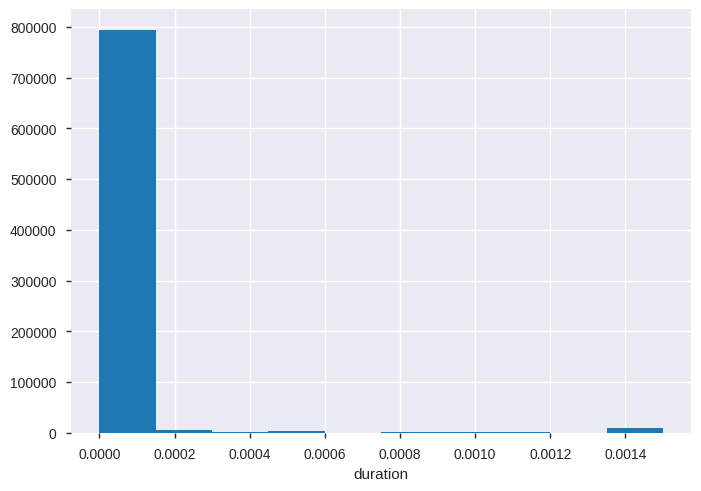

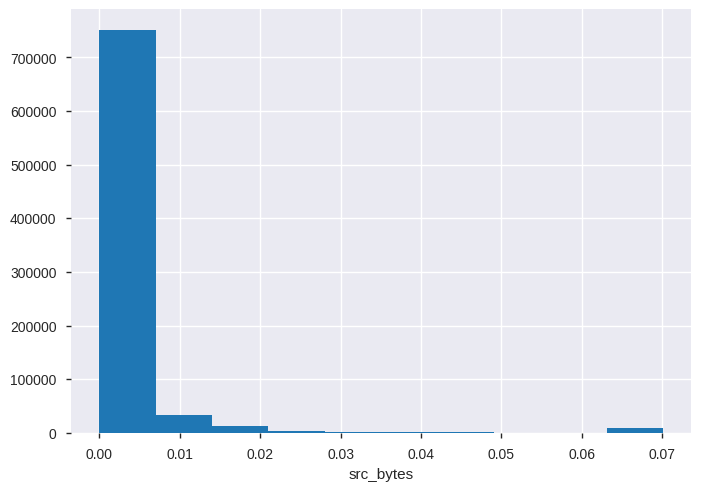

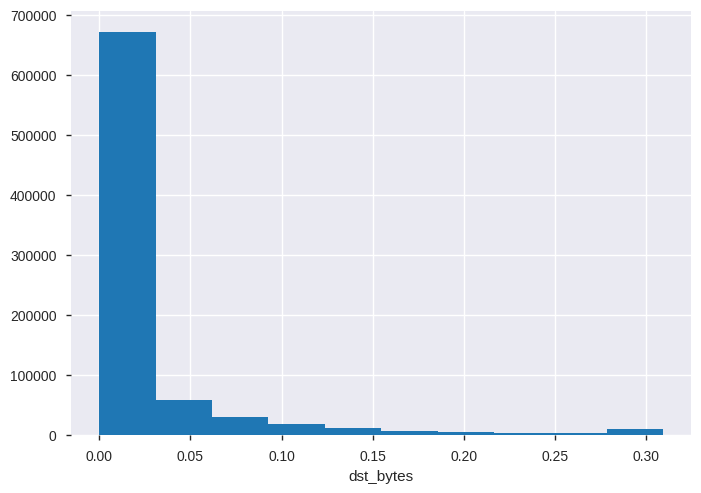

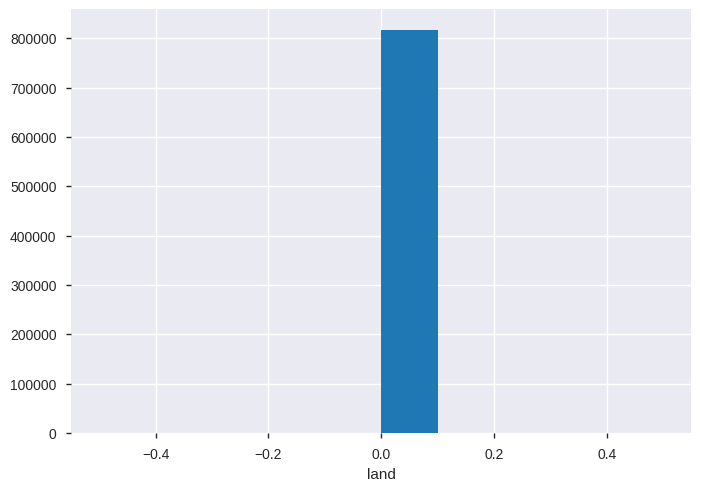

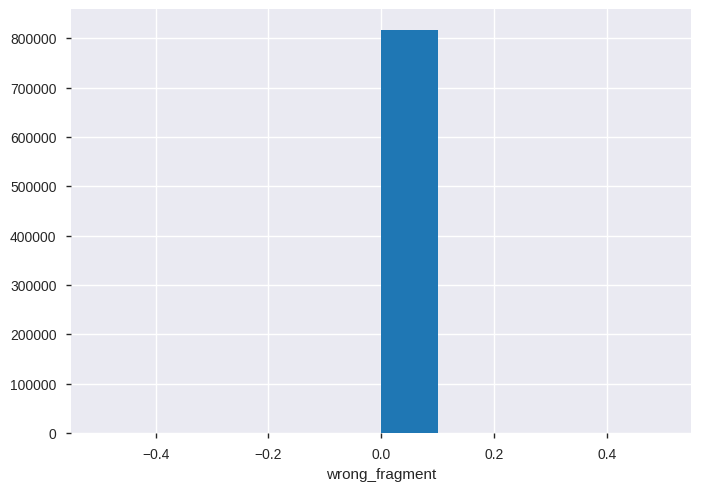

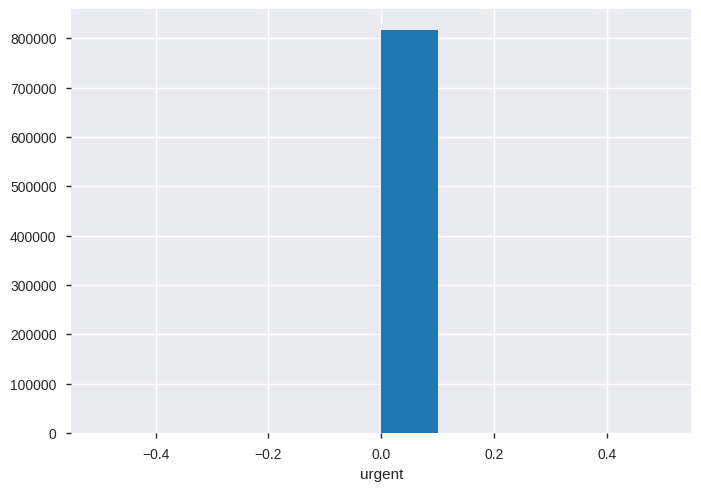

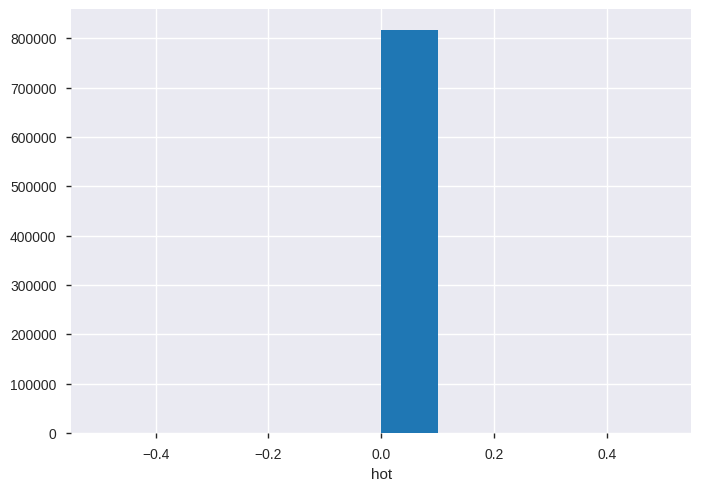

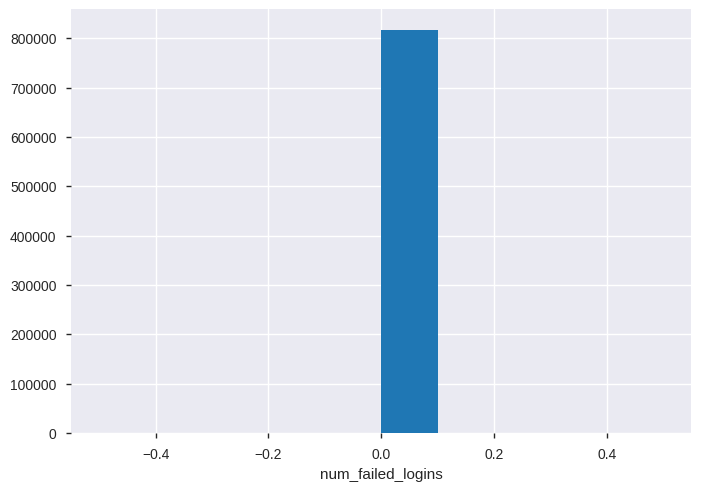

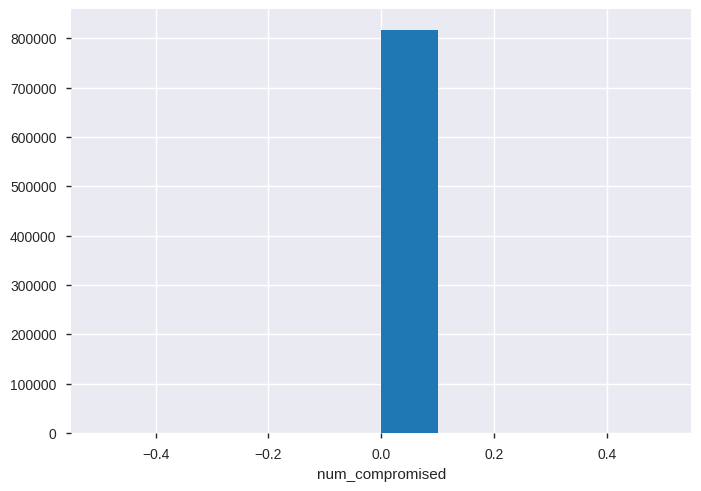

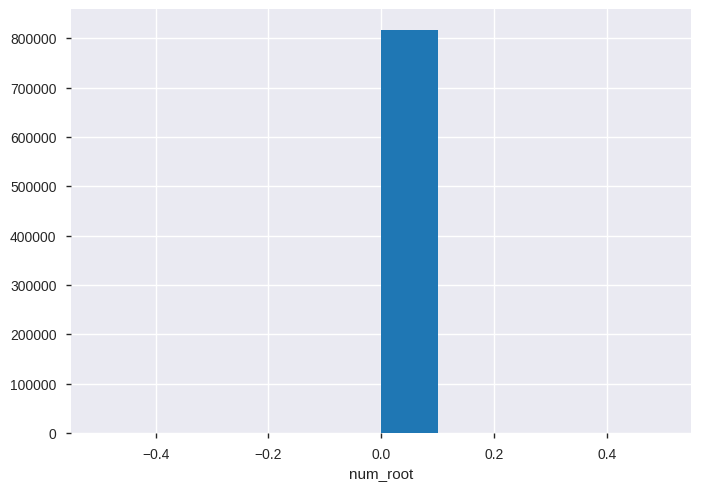

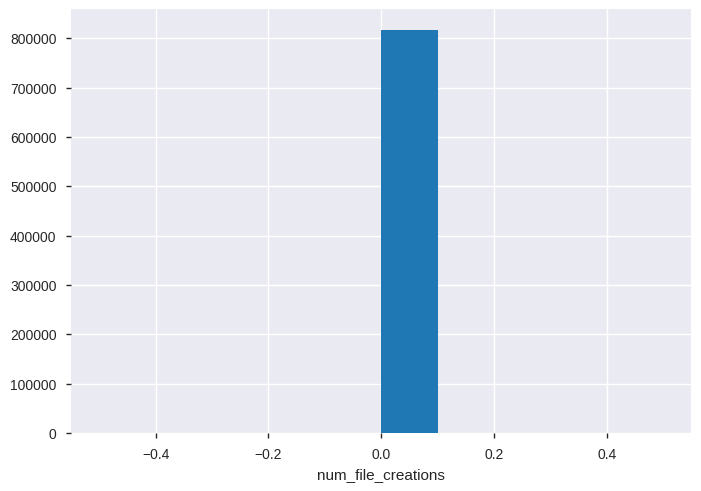

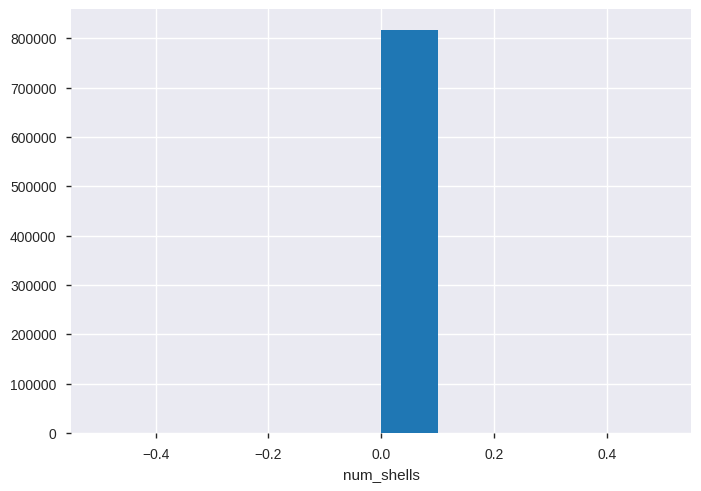

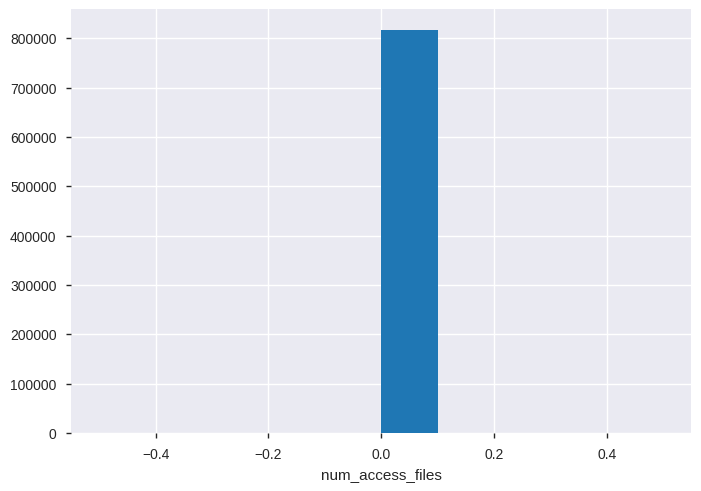

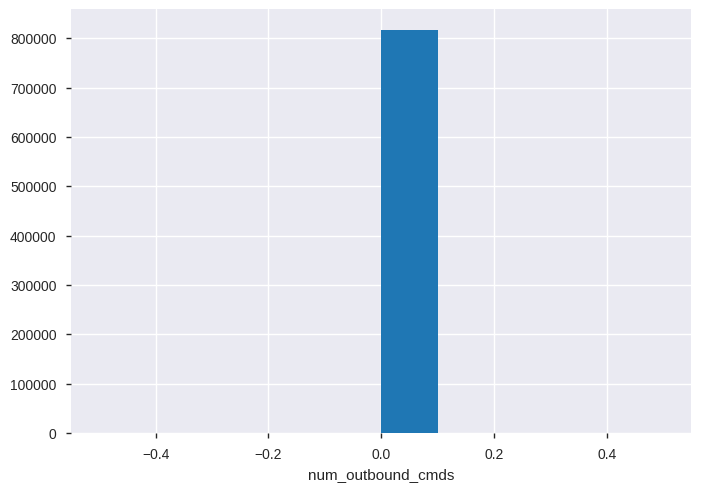

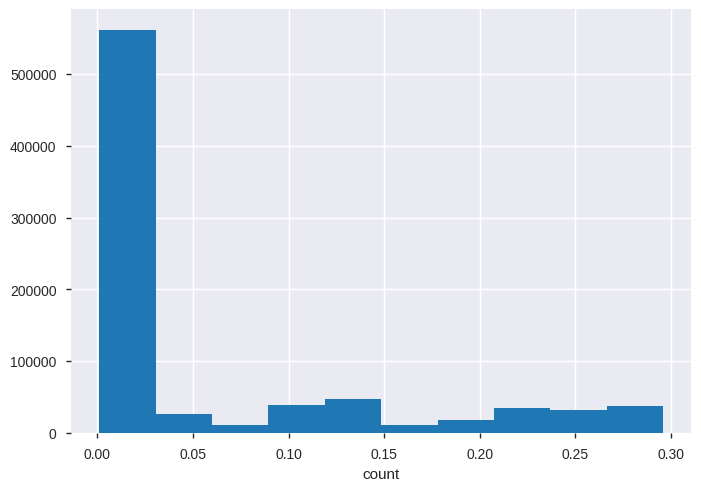

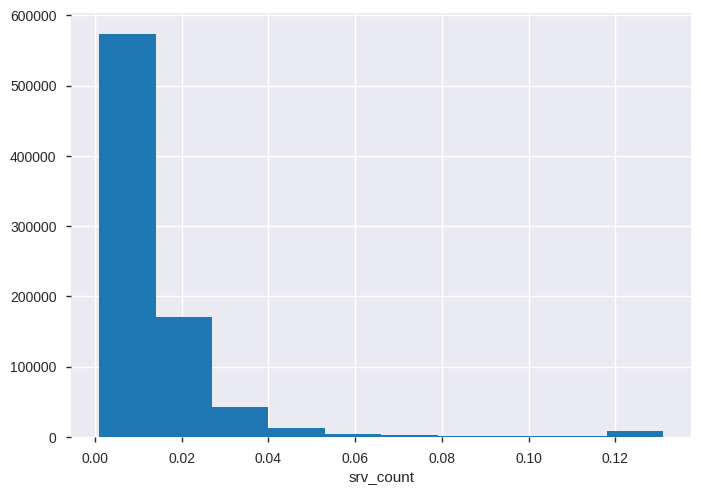

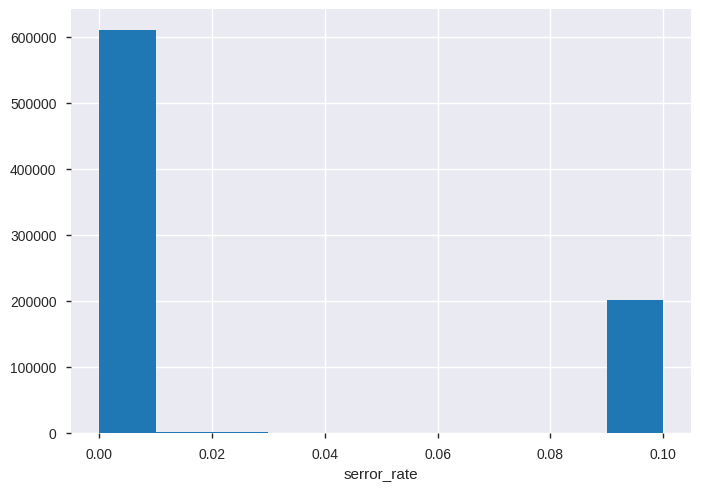

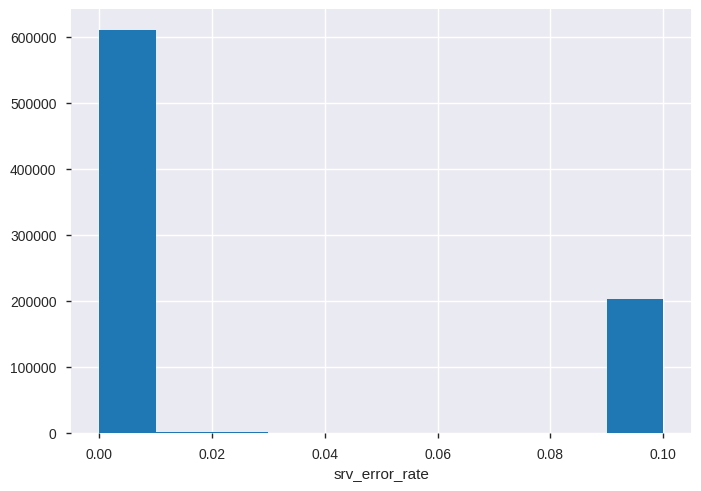

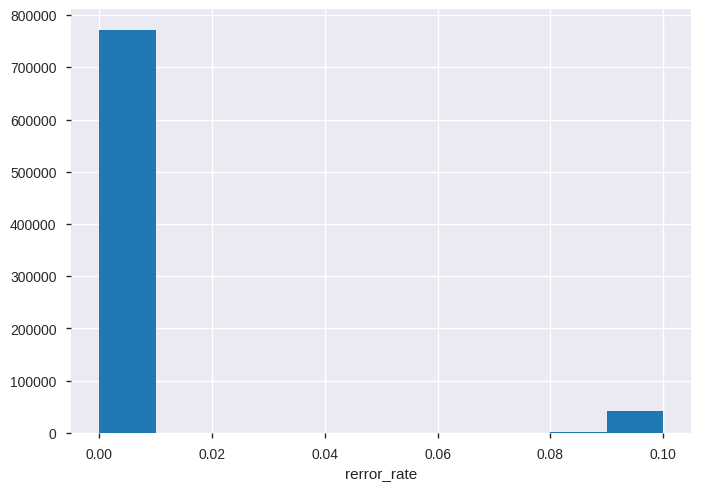

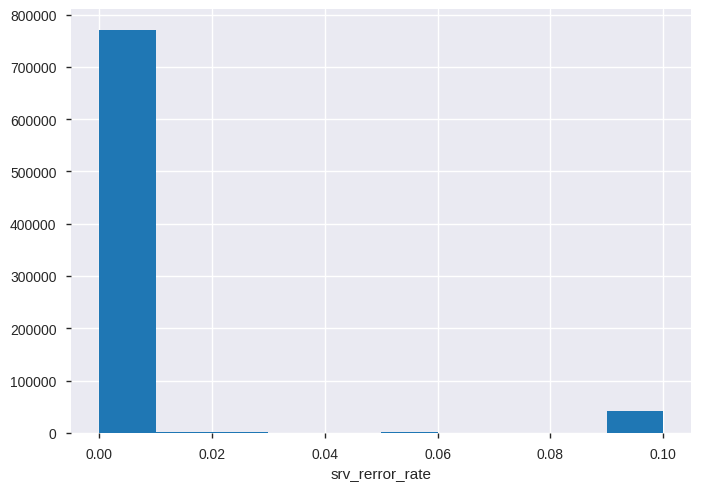

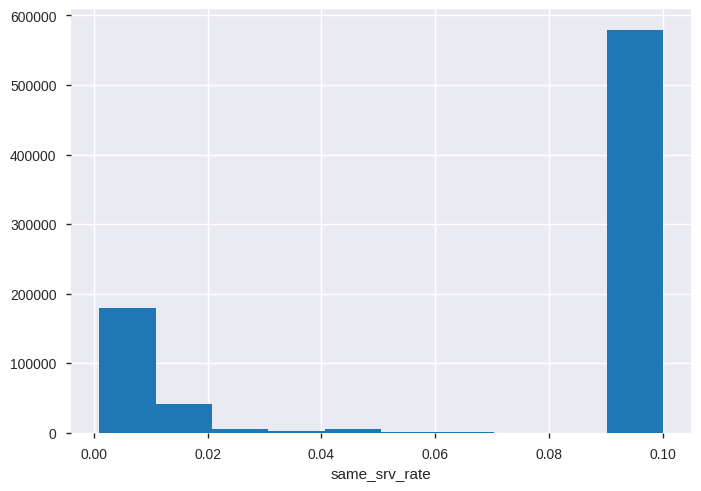

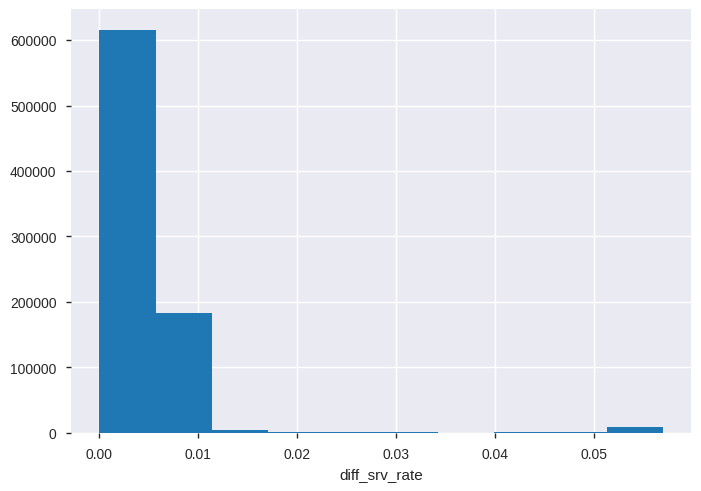

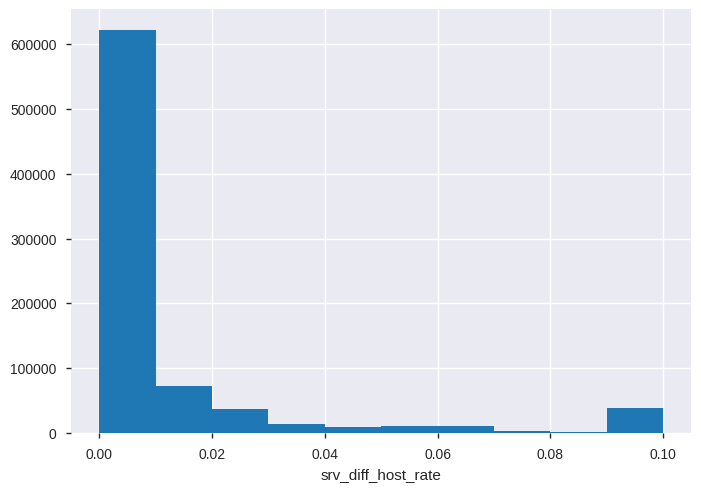

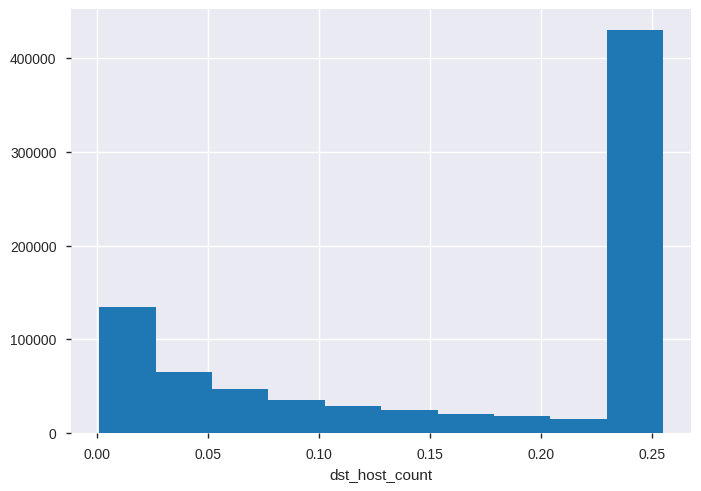

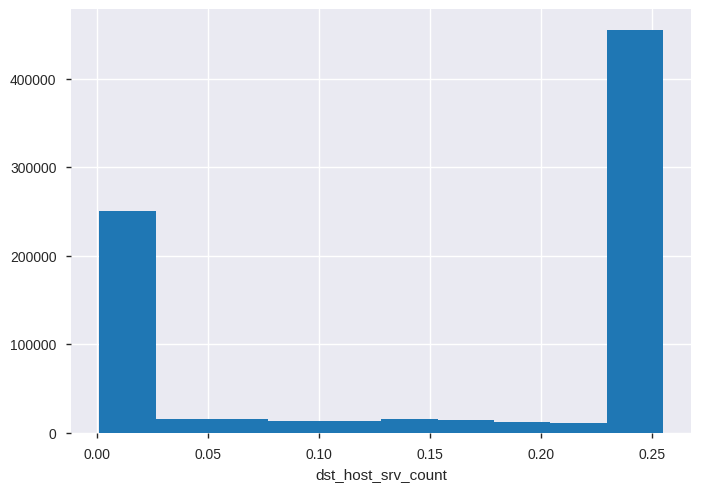

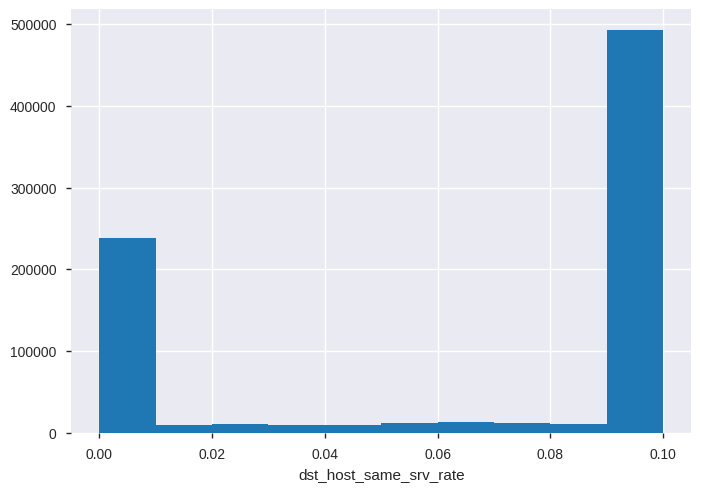

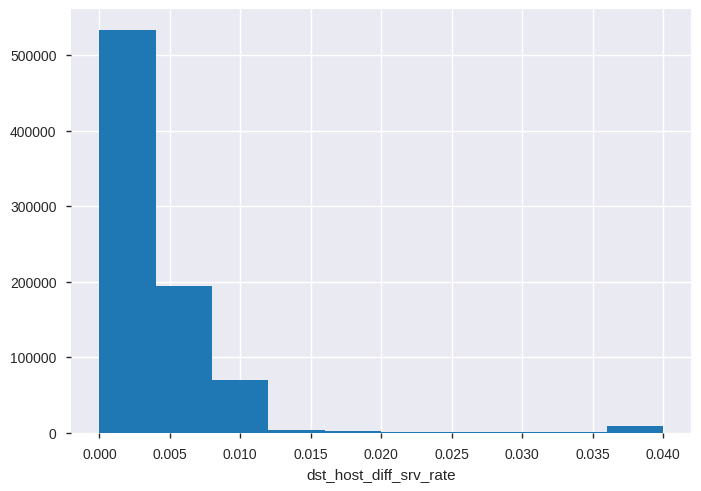

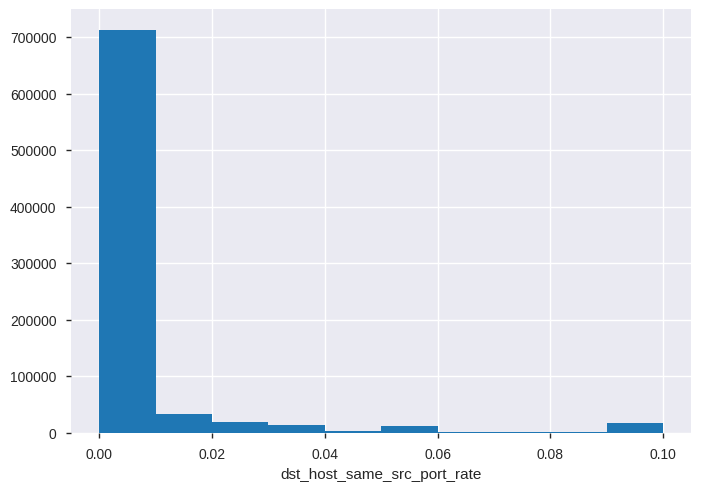

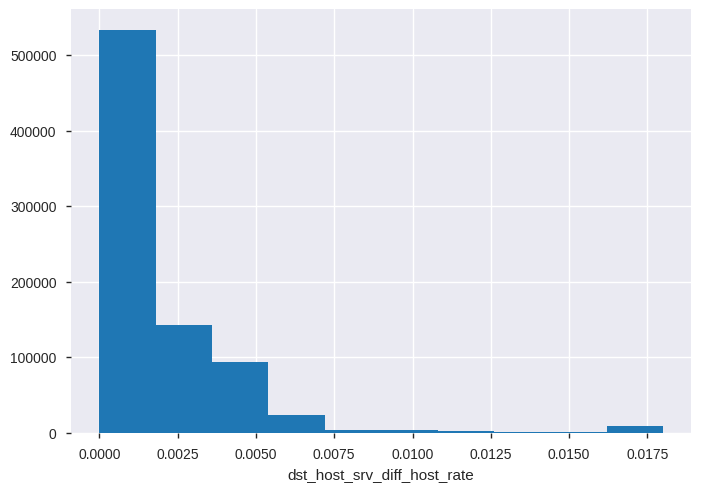

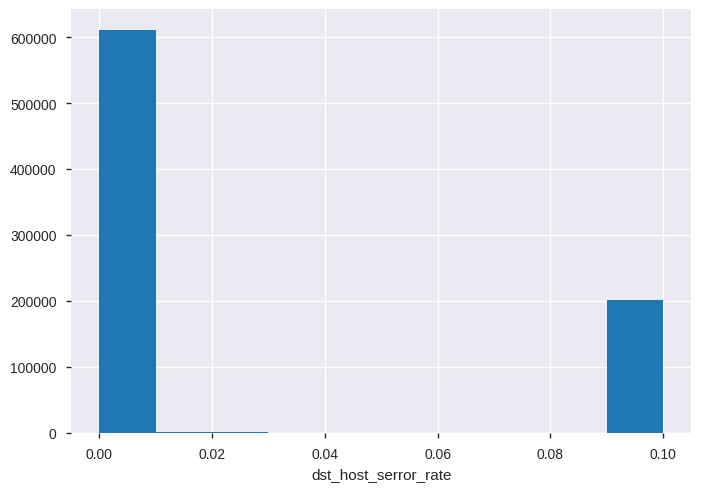

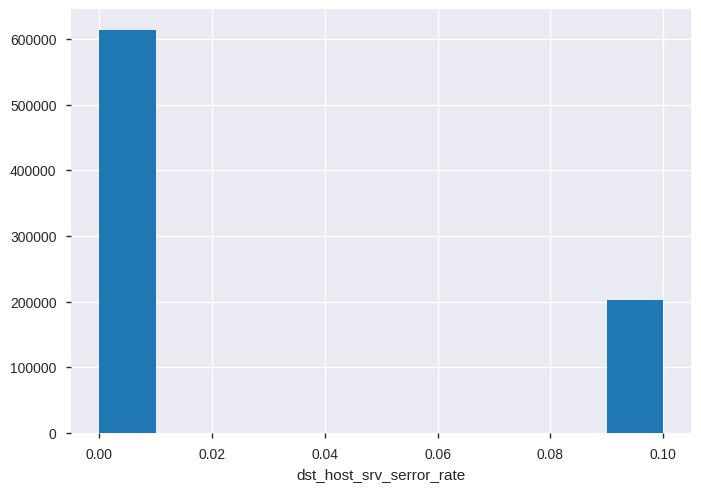

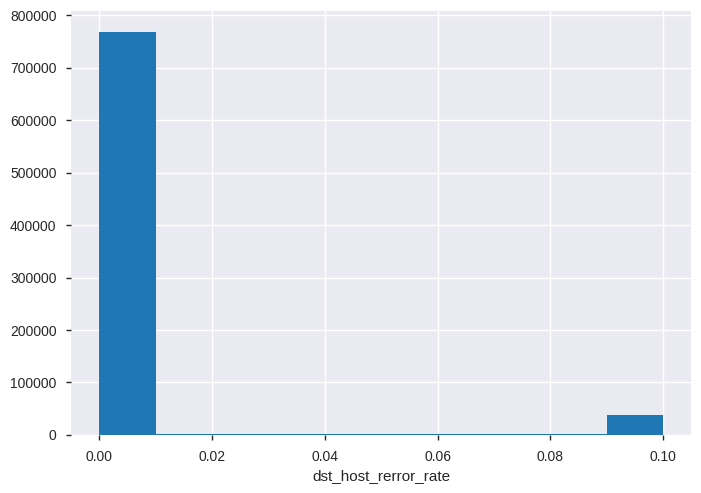

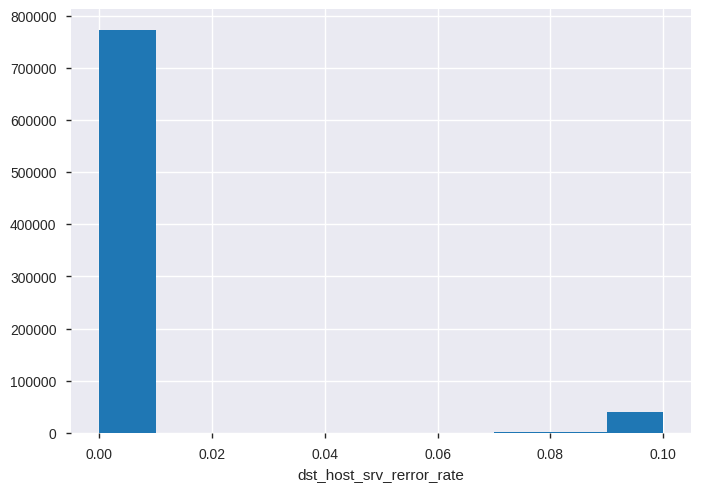

In [30]:
for i in cont_var.columns:
    cont_var[i].hist()
    plt.xlabel(str(i))
    plt.show()

In [31]:
# land,wrong_fragment,urgent,hot,num_failed_logins,num_compromised, num_root, num_file_creations, num_shells, num_access_files,num_outbound_cmds
cont_var.num_outbound_cmds.value_counts()

0    817551
Name: num_outbound_cmds, dtype: int64

In [32]:
# drop constatnt or minority counts for continous features
cont_var.drop(['land', 'wrong_fragment','urgent','hot', 'num_failed_logins', 'num_compromised', 'num_root',
'num_file_creations', 'num_shells', 'num_access_files','num_outbound_cmds'], axis = 1, inplace = True)

In [33]:
cont_var.shape

(817551, 22)

In [34]:
cat_var.protocol_type=cat_var.protocol_type.apply(lambda x:str(x).strip())
cat_var.flag=cat_var.flag.apply(lambda x:str(x).strip())
cat_var.service=cat_var.service.apply(lambda x:str(x).strip())

In [35]:
cat_var.protocol_type.unique()

array(['0.0', '0.01', '0.02'], dtype=object)

In [36]:
cat_var.protocol_type=cat_var.protocol_type.map({'0.0':'zero','0.01':'one','0.02':'two'})

In [37]:
cat_var.protocol_type.unique()

array(['zero', 'one', 'two'], dtype=object)

In [38]:
cat_var.flag.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.1', '0.09'], dtype=object)

In [39]:
cat_var.flag=cat_var.flag.map({'0.0':'zero','0.01':'one','0.02':'two','0.03':'three','0.04':'four','0.05':'five','0.06':'six','0.07':'seven','0.08':'eight','0.09':'nine','0.1':'ten'})

In [40]:
cat_var.flag.unique()

array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
       'eight', 'ten', 'nine'], dtype=object)

In [41]:
cat_var.service.unique()

array(['0.0', '0.01', '0.02', '0.03', '0.04', '0.05', '0.06', '0.07',
       '0.08', '0.09', '0.1', '0.11', '0.13', '0.14', '0.17', '0.32',
       '0.22', '0.12', '0.33', '0.39', '0.19', '0.62', '0.35', '0.24',
       '0.36', '0.37', '0.38', '0.52', '0.47', '0.59', '0.55', '0.28',
       '0.29', '0.27', '0.26', '0.25', '0.23', '0.21', '0.2', '0.15',
       '0.16', '0.3', '0.31', '0.18', '0.5', '0.46', '0.58', '0.57',
       '0.51', '0.41', '0.6', '0.56', '0.43', '0.4', '0.63', '0.64',
       '0.65', '0.42', '0.53', '0.48', '0.44', '0.45', '0.34', '0.54',
       '0.61', '0.49', '0.67'], dtype=object)

In [42]:
cat_var.service=cat_var.service.map({'0.0':'zero','0.01':'one','0.02':'two','0.03':'three','0.04':'four','0.05':'five','0.06':'six','0.07':'seven','0.08':'eight','0.09':'nine','0.1':'ten','0.11':'eleven','0.12':'tweleve','0.13':'thirteen','0.14':'fourteen','0.15':'fiveteen','0.16':'sixteen','0.17':'seventeen','0.18':'eighteen','0.19':'ninteen','0.2':'tweenty','0.21':'2_one','0.22':'2_two','0.23':'2_three','0.24':'2_four','0.25':'2_five','0.26':'2_six','0.27':'2_seven','0.28':'2_eight','0.29':'2_nine','0.3':'thirty','0.31':'3_one','0.32':'3_two','0.33':'3_three','0.34':'3_four','0.35':'3_five','0.36':'3_six','0.37':'3_seven','0.38':'3_eight','0.39':'3_nine','0.4':'fourty','0.41':'4_one','0.42':'4_two','0.43':'4_three','0.44':'4_four','0.45':'4_five','0.46':'4_six','0.47':'4_seven','0.48':'4_eight','0.49':'4_nine','0.5':'fifty','0.51':'5_one','0.52':'5_two','0.53':'5_three','0.54':'5_four','0.55':'5_five','0.56':'5_six','0.57':'5_seven','0.58':'5_eight','0.59':'5_nine','0.6':'sixty','0.61':'6_one','0.62':'6_two','0.63':'6_three','0.64':'6_four','0.65':'6_five','0.66':'6_six','0.67':'6_seven'})

In [43]:
cat_var.service.unique()

array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
       'eight', 'nine', 'ten', 'eleven', 'thirteen', 'fourteen',
       'seventeen', '3_two', '2_two', 'tweleve', '3_three', '3_nine',
       'ninteen', '6_two', '3_five', '2_four', '3_six', '3_seven',
       '3_eight', '5_two', '4_seven', '5_nine', '5_five', '2_eight',
       '2_nine', '2_seven', '2_six', '2_five', '2_three', '2_one',
       'tweenty', 'fiveteen', 'sixteen', 'thirty', '3_one', 'eighteen',
       'fifty', '4_six', '5_eight', '5_seven', '5_one', '4_one', 'sixty',
       '5_six', '4_three', 'fourty', '6_three', '6_four', '6_five',
       '4_two', '5_three', '4_eight', '4_four', '4_five', '3_four',
       '5_four', '6_one', '4_nine', '6_seven'], dtype=object)

In [44]:
cat_var.logged_in.unique()

[0.1, 0.0]
Categories (2, float64): [0.1, 0.0]

In [45]:
cat_var.logged_in=cat_var.logged_in.map({0.0:'zero',0.1:'one'})

In [46]:
cat_var.logged_in.unique()

['one', 'zero']
Categories (2, object): ['one', 'zero']

In [47]:
def count_charts(x):
    sns.countplot(x)
    plt.show()

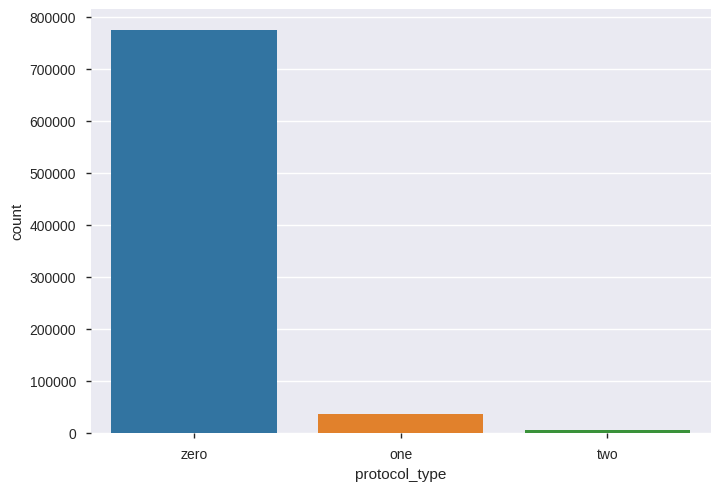

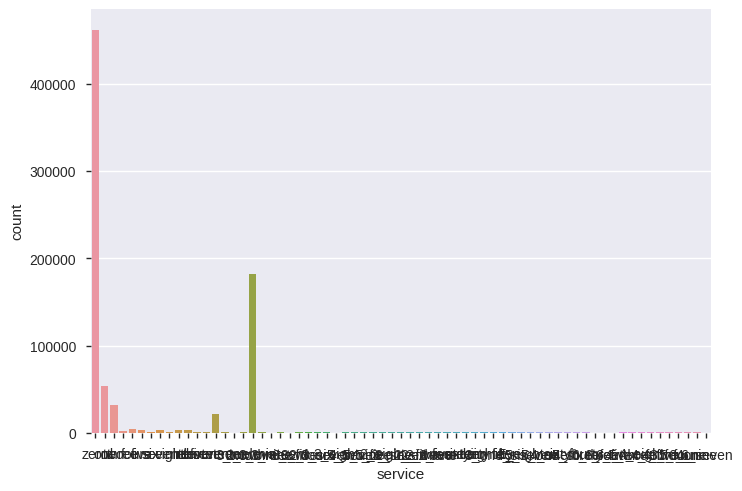

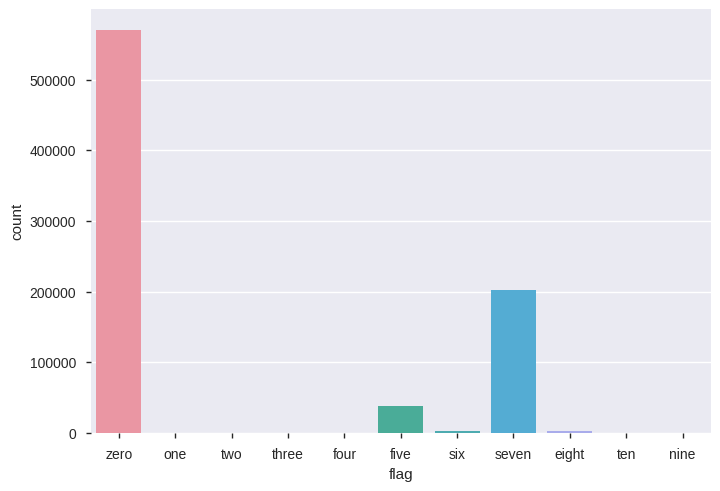

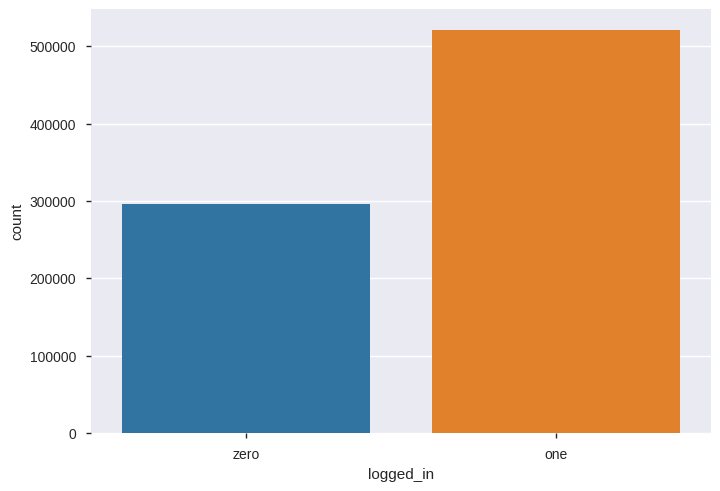

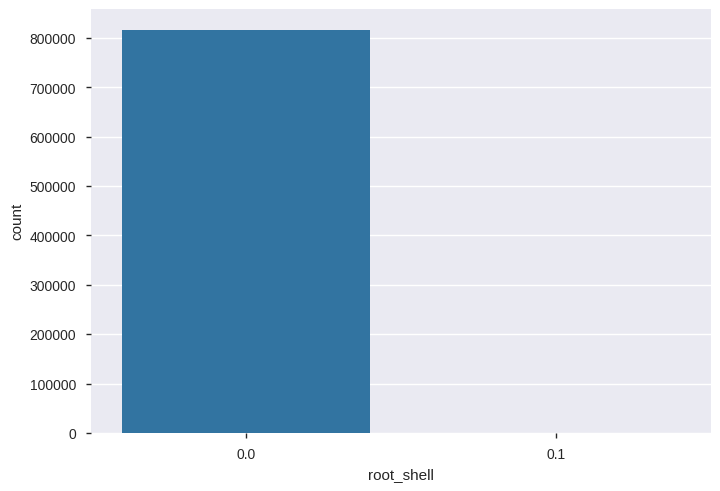

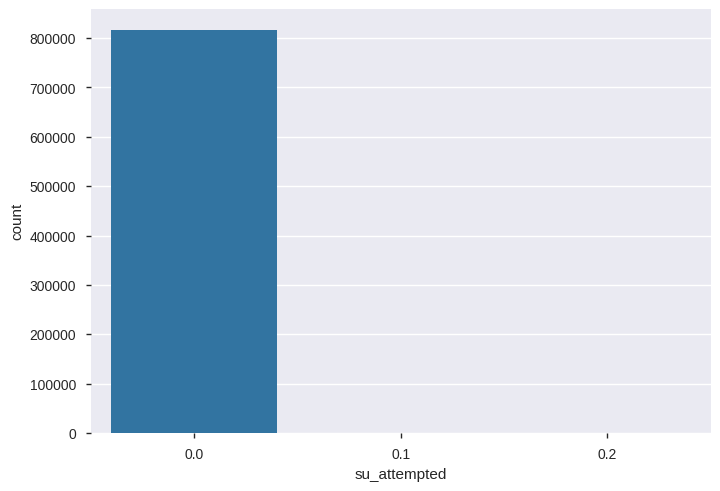

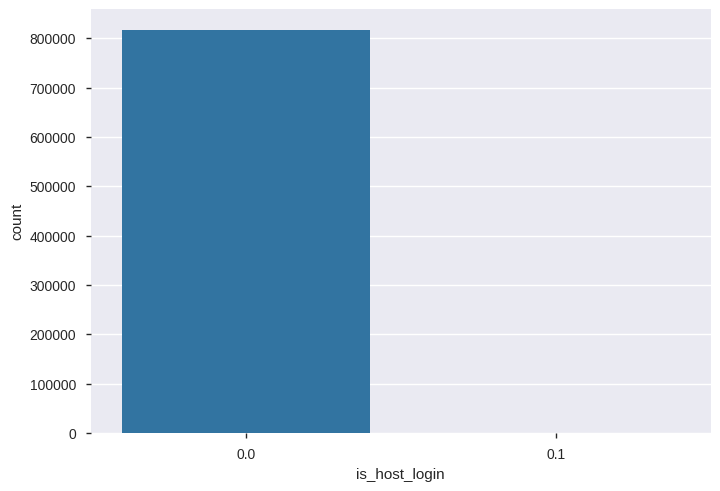

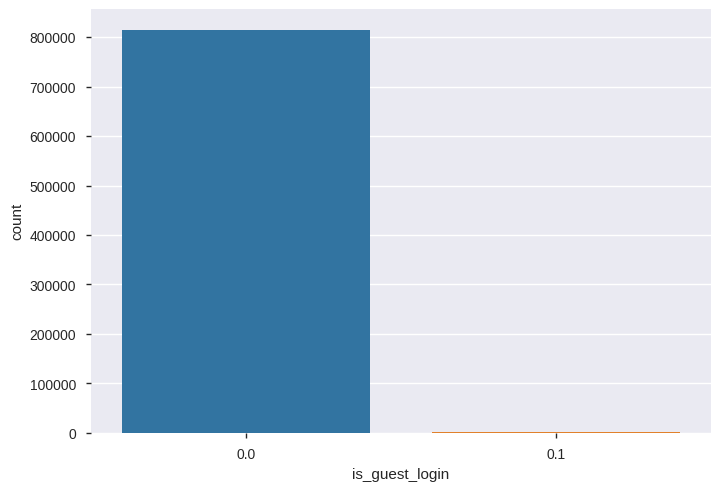

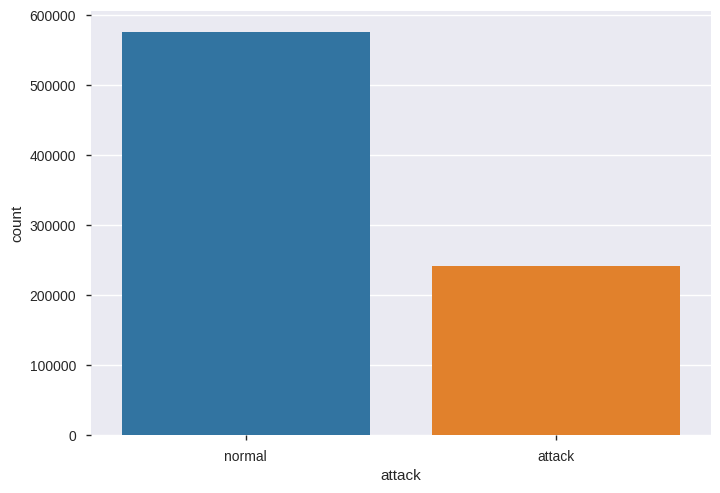

protocol_type     None
service           None
flag              None
logged_in         None
root_shell        None
su_attempted      None
is_host_login     None
is_guest_login    None
attack            None
dtype: object

In [48]:
cat_var.apply(count_charts)

In [49]:
cat_var.is_host_login.value_counts()

0.0    817550
0.1         1
Name: is_host_login, dtype: int64

#### i will drop the feature is_host_login as it almost constant

In [50]:
cat_var.protocol_type.value_counts(normalize=True)

zero    0.949869
one     0.043302
two     0.006829
Name: protocol_type, dtype: float64

In [51]:
cat_var.flag.value_counts(normalize=True)

zero     0.698206
seven    0.247917
five     0.047188
six      0.003108
eight    0.002471
two      0.000405
ten      0.000365
nine     0.000149
one      0.000119
four     0.000049
three    0.000023
Name: flag, dtype: float64

In [52]:
cat_var.service.value_counts()

zero        462331
tweleve     181678
one          53979
two          31806
fourteen     21976
             ...  
3_eight          5
6_seven          2
6_four           2
6_five           2
6_three          1
Name: service, Length: 67, dtype: int64

In [53]:
cat_var.logged_in.value_counts(normalize=True)

one     0.638119
zero    0.361881
Name: logged_in, dtype: float64

In [54]:
# drop constatnt or minority counts for categorical features
cat_var=cat_var.drop(columns=['is_host_login','is_guest_login','root_shell','su_attempted'])

In [55]:
cat_var.columns

Index(['protocol_type', 'service', 'flag', 'logged_in', 'attack'], dtype='object')

In [56]:
df_final=pd.concat([cont_var, cat_var], axis = 1)

In [57]:
df_final.head(5)

,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,logged_in,attack
0,0.0,0.00215,0.309345,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,zero,zero,zero,one,normal
1,0.0,0.00162,0.045280,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,zero,zero,zero,one,normal
2,0.0,0.00236,0.012280,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,zero,zero,zero,one,normal
3,0.0,0.00233,0.020320,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,zero,zero,zero,one,normal
4,0.0,0.00239,0.004860,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,zero,zero,zero,one,normal


In [58]:
df_final = pd.get_dummies(df_final, columns=cat_var.columns, drop_first=True)

In [59]:
df_final.head()

,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_two,protocol_type_zero,service_2_five,service_2_four,service_2_nine,service_2_one,service_2_seven,service_2_six,service_2_three,service_2_two,service_3_eight,service_3_five,service_3_four,service_3_nine,service_3_one,service_3_seven,service_3_six,service_3_three,...,service_6_seven,service_6_three,service_6_two,service_eight,service_eighteen,service_eleven,service_fifty,service_five,service_fiveteen,service_four,service_fourteen,service_fourty,service_nine,service_ninteen,service_one,service_seven,service_seventeen,service_six,service_sixteen,service_sixty,service_ten,service_thirteen,service_thirty,service_three,service_tweenty,service_tweleve,service_two,service_zero,flag_five,flag_four,flag_nine,flag_one,flag_seven,flag_six,flag_ten,flag_three,flag_two,flag_zero,logged_in_one,attack_normal
0,0.0,0.00215,0.309345,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
1,0.0,0.00162,0.045280,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
2,0.0,0.00236,0.012280,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
3,0.0,0.00233,0.020320,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
4,0.0,0.00239,0.004860,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1


#### After iterating through flag features found flag_zero & flag_seven have the majority counts therefor all other flags will be combined in feature calles flag_others

In [60]:
df_final['flag_others']=df_final.flag_one+df_final.flag_two+df_final.flag_three+df_final.flag_four+df_final.flag_five+df_final.flag_six+df_final.flag_nine+df_final.flag_ten

In [61]:
df_final.drop(columns=['flag_one','flag_two','flag_three','flag_four','flag_five','flag_six','flag_nine','flag_ten'], inplace=True)

In [62]:
df_final.shape

(817551, 95)

#### After iterating through Service features found service_zero & twelve have the majority counts therefor all other service will be combined in feature calles service_others

In [63]:
df_final['service_others']=df_final.service_one +df_final.service_two +df_final.service_three +df_final.service_four +df_final.service_five +df_final.service_six +df_final.service_seven +df_final.service_eight +df_final.service_nine +df_final.service_ten +df_final.service_eleven +df_final.service_thirteen +df_final.service_fourteen +df_final.service_seventeen +df_final.service_3_two +df_final.service_2_two  +df_final.service_3_three +df_final.service_3_nine +df_final.service_ninteen +df_final.service_6_two +df_final.service_3_five +df_final.service_2_four +df_final.service_3_six +df_final.service_3_seven +df_final.service_3_eight +df_final.service_5_two +df_final.service_4_seven +df_final.service_5_nine +df_final.service_5_five+df_final.service_2_nine +df_final.service_2_seven +df_final.service_2_six +df_final.service_2_five +df_final.service_2_three +df_final.service_2_one +df_final.service_tweenty +df_final.service_fiveteen +df_final.service_sixteen +df_final.service_thirty +df_final.service_3_one +df_final.service_eighteen +df_final.service_fifty +df_final.service_4_six +df_final.service_5_eight +df_final.service_5_seven +df_final.service_5_one +df_final.service_4_one +df_final.service_sixty +df_final.service_5_six +df_final.service_4_three +df_final.service_fourty +df_final.service_6_three +df_final.service_6_four +df_final.service_6_five +df_final.service_4_two +df_final.service_5_three +df_final.service_4_eight +df_final.service_4_four +df_final.service_4_five +df_final.service_3_four +df_final.service_5_four +df_final.service_6_one +df_final.service_4_nine +df_final.service_6_seven

In [64]:
df_final.drop(columns=['service_one','service_two','service_three','service_four' ,'service_five','service_six','service_seven' ,'service_eight','service_nine','service_ten','service_eleven','service_thirteen','service_fourteen' ,'service_seventeen','service_3_two' ,'service_2_two' ,'service_3_three' ,'service_3_nine','service_ninteen','service_6_two','service_3_five','service_2_four','service_3_six','service_3_seven','service_3_eight','service_5_two','service_4_seven','service_5_nine','service_5_five','service_2_nine','service_2_seven','service_2_six' ,'service_2_five','service_2_three','service_2_one','service_tweenty','service_fiveteen','service_sixteen','service_thirty','service_3_one','service_eighteen','service_fifty','service_4_six','service_5_eight','service_5_seven','service_5_one','service_4_one','service_sixty' ,'service_5_six','service_4_three','service_fourty' ,'service_6_three','service_6_four','service_6_five' ,'service_4_two','service_5_three' ,'service_4_eight' ,'service_4_four','service_4_five','service_3_four' ,'service_5_four','service_6_one' ,'service_4_nine' ,'service_6_seven'],inplace=True)

In [65]:
z='df_final_'+ ' +df_final.service_'.join(cat_var.service.unique())

In [66]:
z

'df_final_zero +df_final.service_one +df_final.service_two +df_final.service_three +df_final.service_four +df_final.service_five +df_final.service_six +df_final.service_seven +df_final.service_eight +df_final.service_nine +df_final.service_ten +df_final.service_eleven +df_final.service_thirteen +df_final.service_fourteen +df_final.service_seventeen +df_final.service_3_two +df_final.service_2_two +df_final.service_tweleve +df_final.service_3_three +df_final.service_3_nine +df_final.service_ninteen +df_final.service_6_two +df_final.service_3_five +df_final.service_2_four +df_final.service_3_six +df_final.service_3_seven +df_final.service_3_eight +df_final.service_5_two +df_final.service_4_seven +df_final.service_5_nine +df_final.service_5_five +df_final.service_2_eight +df_final.service_2_nine +df_final.service_2_seven +df_final.service_2_six +df_final.service_2_five +df_final.service_2_three +df_final.service_2_one +df_final.service_tweenty +df_final.service_fiveteen +df_final.service_s

In [67]:
df_final.shape

(817551, 32)

### Features reduction 

In [68]:
import statsmodels.formula.api as smf
from sklearn.metrics import roc_auc_score

In [69]:
gini_df=pd.DataFrame()
for i in df_final.columns.difference(['attack_normal']):
    model=smf.logit('attack_normal~'+str(i),data=df_final).fit()
    gini=2*roc_auc_score(df_final.attack_normal,model.predict())-1
    temp=pd.DataFrame([i,gini]).T
    gini_df=pd.concat([gini_df,temp], axis=0)

Optimization terminated successfully.
         Current function value: 0.144329
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.322256
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.302277
         Iterations 13
Optimization terminated successfully.
         Current function value: 0.402241
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.353460
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.584938
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.596197
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.118491
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.176473
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.148216

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.587103
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.177620
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.108459
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.185127
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.603493
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.603056
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.584108
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.065426
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.177421
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.605733

In [70]:
gini_df.columns=['feature','gini']

In [71]:
gini_df.sort_values(by = 'gini', inplace=True, ascending=False)

In [72]:
l1_sd=gini_df[gini_df.gini>=0.1].feature.values

In [73]:
l1_sd

array(['dst_host_same_srv_rate', 'same_srv_rate', 'dst_host_srv_count',
       'diff_srv_rate', 'flag_zero', 'src_bytes', 'count', 'dst_bytes',
       'dst_host_diff_srv_rate', 'logged_in_one', 'dst_host_serror_rate',
       'serror_rate', 'flag_seven', 'srv_error_rate',
       'dst_host_srv_serror_rate', 'service_zero', 'service_tweleve',
       'dst_host_count', 'dst_host_srv_diff_host_rate',
       'dst_host_same_src_port_rate', 'srv_diff_host_rate', 'rerror_rate',
       'srv_rerror_rate', 'flag_others'], dtype=object)

In [74]:
len(l1_sd)

24

In [75]:
from sklearn.feature_selection import RFE, SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier

In [76]:
X = df_final[df_final.columns.difference(['attack_normal'])]
y = df_final[['attack_normal']]

In [77]:
SKB = SelectKBest(f_classif, k=20).fit(X, y )

In [78]:
X.columns[SKB.get_support()]

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag_seven',
       'flag_zero', 'logged_in_one', 'same_srv_rate', 'serror_rate',
       'service_tweleve', 'service_zero', 'src_bytes', 'srv_diff_host_rate',
       'srv_error_rate'],
      dtype='object')

In [79]:
l2_SKB=X.columns[SKB.get_support()]

In [82]:
RFE



rfe = RFE(RandomForestClassifier(), n_features_to_select=15).fit(X,y)

X.columns[rfe.get_support()]

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_srv_count', 'dst_host_srv_diff_host_rate',
       'dst_host_srv_serror_rate', 'flag_zero', 'protocol_type_two',
       'same_srv_rate', 'service_tweleve', 'src_bytes', 'srv_error_rate'],
      dtype='object')

In [83]:
l3_rfe=X.columns[rfe.get_support()]

In [84]:
Final_list=list(set(list(l1_sd)+list(l2_SKB)+list(l3_rfe)))

In [85]:
Final_list

['service_tweleve',
 'same_srv_rate',
 'src_bytes',
 'dst_host_srv_serror_rate',
 'protocol_type_two',
 'dst_host_srv_diff_host_rate',
 'serror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_serror_rate',
 'srv_error_rate',
 'dst_host_srv_count',
 'rerror_rate',
 'dst_bytes',
 'service_zero',
 'flag_others',
 'flag_zero',
 'dst_host_count',
 'flag_seven',
 'srv_rerror_rate',
 'count',
 'logged_in_one']

In [86]:
Final_list=['srv_diff_host_rate',
 #'srv_rerror_rate',
 'flag_others',
 #'serror_rate',
 'dst_bytes',
 'count',
 'dst_host_same_src_port_rate',
 #'dst_host_same_srv_rate',
 #'dst_host_srv_count',
 'diff_srv_rate',
 'protocol_type_two',
 #'same_srv_rate',
 'dst_host_diff_srv_rate',
 'service_tweleve',
 #'flag_seven',
 #'srv_error_rate',
 #'dst_host_serror_rate',
 'dst_host_srv_diff_host_rate',
 #'logged_in_one',
 'dst_host_count',
 #'rerror_rate',
 #'flag_zero',
 'service_zero',
 #'dst_host_srv_serror_rate',
 'src_bytes']

In [88]:
X_new = X[Final_list]
y = y

In [89]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X_new.values, i) for i in range(X_new.shape[1])]
vif["features"] = X_new.columns

In [90]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

,VIF_Factor,features
10,4.731712,dst_host_count
11,3.602130,service_zero
3,3.449082,count
8,2.840789,service_tweleve
7,2.492998,dst_host_diff_srv_rate
9,2.036771,dst_host_srv_diff_host_rate
5,1.734962,diff_srv_rate
4,1.454230,dst_host_same_src_port_rate
2,1.423554,dst_bytes
12,1.274932,src_bytes


In [91]:
data_new = pd.concat([X_new, y], axis=1)

In [92]:
data_new.shape

(817551, 14)

#### Train and Test data

In [93]:
#split the data into train & test (70%:30%) - modeling technique using statsmodels
train, test = train_test_split(data_new, test_size = 0.3, random_state=123 )

In [94]:
#split the data into train & test (70%:30%) - Modeling technique using SVC, XGboost
train_X, test_X,train_y, test_y = train_test_split(X_new, y, test_size = 0.3, random_state=123 )

### Modeling 

In [95]:
#Logistic Regression

import statsmodels.formula.api as smf



eqn = 'attack_normal~ '+'+'.join(X_new.columns)

In [96]:
eqn

'attack_normal~ srv_diff_host_rate+flag_others+dst_bytes+count+dst_host_same_src_port_rate+diff_srv_rate+protocol_type_two+dst_host_diff_srv_rate+service_tweleve+dst_host_srv_diff_host_rate+dst_host_count+service_zero+src_bytes'

In [97]:
logit_model =smf.logit(formula = eqn, data= train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.048330
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:          attack_normal   No. Observations:               572285
Model:                          Logit   Df Residuals:                   572271
Method:                           MLE   Df Model:                           13
Date:                Mon, 17 Jan 2022   Pseudo R-squ.:                  0.9203
Time:                        09:53:52   Log-Likelihood:                -27659.
converged:                       True   LL-Null:                   -3.4695e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       8.8018      0.086    101.983      0.000  

#Mathematical equation:

LE = 2.4678*srv_diff_host_rate -2.1409*flag_others+0.3535*dst_bytes-27.2012*count-13.4015*dst_host_same_src_port_rate-61.6645*diff_srv_rate-4.0540*protocol_type_two-117.8704*dst_host_diff_srv_rate-10.1839*service_tweleve-158.5179*dst_host_srv_diff_host_rate-20.0878*dst_host_count+1.3946*service_zero-14.5385*src_bytes+8.8018

P(attack_normal=1) = exp(LE)/(1+exp(LE))

In [98]:
train['pred_prob'] =logit_model.predict(train)

In [99]:
train.head()

,srv_diff_host_rate,flag_others,dst_bytes,count,dst_host_same_src_port_rate,diff_srv_rate,protocol_type_two,dst_host_diff_srv_rate,service_tweleve,dst_host_srv_diff_host_rate,dst_host_count,service_zero,src_bytes,attack_normal,pred_prob
785574,0.000,0,0.00000,0.296,0.000,0.004,0,0.005,1,0.000,0.255,0,0.00000,0,2.067006e-07
167091,0.022,0,0.00238,0.008,0.002,0.000,0,0.000,0,0.005,0.050,1,0.00232,1,9.997189e-01
716977,0.000,0,0.00000,0.024,0.001,0.012,0,0.006,0,0.000,0.255,0,0.00000,0,8.272166e-01
479391,0.000,0,0.00000,0.016,0.032,0.000,0,0.002,0,0.000,0.162,0,0.00201,1,9.880923e-01
788708,0.000,0,0.00000,0.003,0.001,0.057,0,0.002,0,0.000,0.255,0,0.00000,0,4.585526e-01


In [100]:
test['pred_prob'] =logit_model.predict(test)

In [101]:
print('train_auc', roc_auc_score(train.attack_normal, train.pred_prob))
print('test_auc', roc_auc_score(test.attack_normal, test.pred_prob))
print('---------------------------------------------------------------')
print('train_gini', 2*roc_auc_score(train.attack_normal, train.pred_prob)-1)
print('test_gini', 2*roc_auc_score(test.attack_normal, test.pred_prob)-1)

train_auc 0.9967501394995785
test_auc 0.9967059323406726
---------------------------------------------------------------
train_gini 0.9935002789991569
test_gini 0.9934118646813452


In [102]:
roc_df = pd.DataFrame()
for cut_off in np.linspace(0,1):
    #roc_df_temp['cut_off'] = cut_off
    train['attack_normal_pred'] = np.where(train.pred_prob>cut_off, 1, 0)
    train['TP'] = np.where(((train.attack_normal ==1) & (train.attack_normal_pred==1)), 1, 0)
    train['TN'] = np.where(((train.attack_normal ==0) & (train.attack_normal_pred==0)), 1, 0)
    train['FP'] = np.where(((train.attack_normal ==0) & (train.attack_normal_pred==1)), 1, 0)
    train['FN'] = np.where(((train.attack_normal ==1) & (train.attack_normal_pred==0)), 1, 0)
    sensitivity = train.TP.sum()/train.attack_normal.sum()
    specificity = train.TN.sum()/(1-train.attack_normal).sum()
    accuracy = (train.TN.sum()+train.TP.sum())/train.attack_normal.count()
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_df = pd.concat([roc_df, roc_like_table], axis=0)

In [103]:
roc_df['total'] = roc_df.sensitivity + roc_df.specificity

In [104]:
roc_df[roc_df.total == roc_df.total.max()]

,cutoff,sensitivity,specificity,accuracy,total
0,0.816327,0.980623,0.987113,0.982535,1.967735


In [105]:
train['y_pred'] = np.where(train.pred_prob>0.816327, 1, 0)
test['y_pred'] = np.where(test.pred_prob>0.816327, 1, 0)

In [106]:
train.head()

,srv_diff_host_rate,flag_others,dst_bytes,count,dst_host_same_src_port_rate,diff_srv_rate,protocol_type_two,dst_host_diff_srv_rate,service_tweleve,dst_host_srv_diff_host_rate,dst_host_count,service_zero,src_bytes,attack_normal,pred_prob,attack_normal_pred,TP,TN,FP,FN,y_pred
785574,0.000,0,0.00000,0.296,0.000,0.004,0,0.005,1,0.000,0.255,0,0.00000,0,2.067006e-07,0,0,1,0,0,0
167091,0.022,0,0.00238,0.008,0.002,0.000,0,0.000,0,0.005,0.050,1,0.00232,1,9.997189e-01,0,0,0,0,1,1
716977,0.000,0,0.00000,0.024,0.001,0.012,0,0.006,0,0.000,0.255,0,0.00000,0,8.272166e-01,0,0,1,0,0,1
479391,0.000,0,0.00000,0.016,0.032,0.000,0,0.002,0,0.000,0.162,0,0.00201,1,9.880923e-01,0,0,0,0,1,1
788708,0.000,0,0.00000,0.003,0.001,0.057,0,0.002,0,0.000,0.255,0,0.00000,0,4.585526e-01,0,0,1,0,0,0


In [107]:
#Module related to calculation of metrics
from sklearn.metrics import classification_report

In [108]:
print(classification_report(train.attack_normal, train.y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    168614
           1       0.99      0.98      0.99    403671

    accuracy                           0.98    572285
   macro avg       0.97      0.98      0.98    572285
weighted avg       0.98      0.98      0.98    572285



In [109]:
print(classification_report(test.attack_normal, test.y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     72227
           1       0.99      0.98      0.99    173039

    accuracy                           0.98    245266
   macro avg       0.98      0.98      0.98    245266
weighted avg       0.98      0.98      0.98    245266



# ML 

## XGBOOST

In [110]:
from xgboost import XGBClassifier

In [111]:
xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=100,
                               max_depth=5,
                               gamma=1,
                               n_jobs=-1,
                               random_state=42,
                               verbose=1).fit(train_X, train_y)

In [112]:
print('train_auc', roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X))[1]))

print('test_auc', roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X))[1]))

train_auc 0.999782361250653
test_auc 0.9997692339393095


In [113]:
print(classification_report(train_y, xgb_estimator.predict(train_X)))

print(classification_report(test_y, xgb_estimator.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    168614
           1       1.00      1.00      1.00    403671

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72227
           1       1.00      1.00      1.00    173039

    accuracy                           1.00    245266
   macro avg       1.00      1.00      1.00    245266
weighted avg       1.00      1.00      1.00    245266



## Multi-class Classification

In [114]:
df.attack.value_counts(normalize=True)

normal             0.705412
Neptune            0.277937
Satan              0.006139
Smurf              0.003678
PortSweep          0.003625
Nmap               0.001901
back               0.001184
Guess_password     0.000065
buffer_overflow    0.000037
RootKit            0.000012
FTP_ write         0.000010
Name: attack, dtype: float64

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 817550
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13 

In [21]:
from sklearn.svm import SVC

In [19]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [20]:
#splitting 
X_multi = df.drop(columns = ['attack'])
y_multi = df["attack"]

In [21]:
#Encoder for y variable
enc =LabelEncoder()
y_multi = enc.fit_transform(y_multi)

In [22]:
y_multi

array([10, 10, 10, ...,  8,  8,  8])

In [23]:
pd.Series(y_multi).value_counts()

10    576710
2     227228
6       5019
7       3007
4       2964
3       1554
8        968
1         53
9         30
5         10
0          8
dtype: int64

In [24]:
#balancing the data
sm = SMOTE()
resampled_X_multi, resampled_y_multi = sm.fit_resample(X_multi, y_multi)

In [27]:
X_multi.shape

(817551, 41)

In [28]:
resampled_X_multi

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.0,0.00,0.0,0.00215,0.450760,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.001000,0.001000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.00,0.0,0.00162,0.045280,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.002000,0.002000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001000,0.001000,0.1,0.0,0.100000,0.000000,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.00,0.0,0.00236,0.012280,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.001000,0.001000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002000,0.002000,0.1,0.0,0.050000,0.000000,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.00,0.0,0.00233,0.020320,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.002000,0.002000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003000,0.003000,0.1,0.0,0.033000,0.000000,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.00,0.0,0.00239,0.004860,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.003000,0.003000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.004000,0.004000,0.1,0.0,0.025000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343805,0.015506,0.0,0.05,0.0,0.01702,0.031675,0,0.0,0.0,0.321436,0.0,0.1,0.200000,0.100000,0.0,0.0,0.078564,0.0,0.0,0,0.0,0.0,0.001000,0.001000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001000,0.002786,0.1,0.0,0.100000,0.074074,0.0,0.0,0.000000,0.000000
6343806,0.003853,0.0,0.05,0.0,0.02402,0.038663,0,0.0,0.0,0.341840,0.0,0.1,0.200000,0.100000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.001000,0.001000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001582,0.002000,0.1,0.0,0.070920,0.041840,0.0,0.0,0.000000,0.000000
6343807,0.005701,0.0,0.05,0.0,0.02345,0.043819,0,0.0,0.0,0.300000,0.0,0.1,0.123008,0.100000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.001000,0.001000,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003071,0.003071,0.1,0.0,0.079293,0.000000,0.0,0.0,0.002301,0.002301
6343808,0.000000,0.0,0.14,0.0,0.00000,0.051622,0,0.0,0.0,0.000000,0.0,0.1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,0.002576,0.002576,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002576,0.065596,0.1,0.0,0.100000,0.001576,0.0,0.0,0.000000,0.000000


In [25]:
#splitting to train and test dataset
X_train, X_test, y_train, y_test = train_test_split(resampled_X_multi, resampled_y_multi, test_size = 0.7)

In [ ]:
xgb = XGBClassifier(learning_rate=0.05,
                               n_estimators=10,
                               max_depth=3,
                               gamma=1,n_jobs=-1,
                               random_state=14,
                               verbose=1)
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["mlogloss"]
xgb.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
xgb.score(X_train, y_train)
xgb.score(X_test, y_test)

[0]	validation_0-mlogloss:2.14723	validation_1-mlogloss:2.17674
[1]	validation_0-mlogloss:1.95005	validation_1-mlogloss:1.98512
[2]	validation_0-mlogloss:1.79845	validation_1-mlogloss:1.79615
[3]	validation_0-mlogloss:1.67486	validation_1-mlogloss:1.65941
[4]	validation_0-mlogloss:1.55859	validation_1-mlogloss:1.55835
[5]	validation_0-mlogloss:1.45161	validation_1-mlogloss:1.48026
[6]	validation_0-mlogloss:1.36643	validation_1-mlogloss:1.34838
[7]	validation_0-mlogloss:1.28513	validation_1-mlogloss:1.29765
[8]	validation_0-mlogloss:1.20561	validation_1-mlogloss:1.22058
[9]	validation_0-mlogloss:1.1406	validation_1-mlogloss:1.14465


 ## I really tried for whole day on colab to use both GPU & TPU to fit this models with different n_estimators and max_depth but in every trial it crash 
   ## actuall last time i sent more than 5 hrs trying to make it work but it did not work

In [1]:
#results of the mlogloss
results = xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

NameError: ignored

In [ ]:
#plotting the mlogloss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('M Log Loss')
pyplot.title('XGBoost M Log Loss')
pyplot.show()